## Topic: Min-Max Scaling

### OUTCOMES

- 1. Introduction of min-max scaling.

- 2. Where it's need? and limitation

- 3. Code Implementation


### 1. Introduction of min-max scaling.

- Definition:
    - To Convert the featues values into a range (0-1).

- Formula:
    - min_max_scaling = (xi - min_value)/(max_value - min_value)

- Note:
    - We sort the featues to easily find the min and max values

### 2. Where it's need? and limitation

- Need:
    - Min_Max scaling use for outliers free dataset.
    - or Regular dataset are use min_max scaling.


- Limitation:
    - Min_Max scaling are outliers affects (Because of min and max values)

### 3. Code Implementation

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

#### Min_Max Scaling for outliers free data

In [ ]:
# outliers free data

df = pd.DataFrame({
    "Height(cm)": [150, 160, 170, 180, 190],
    "Weight (kg)": [50, 60, 70, 80, 90]
})

df

,Height(cm),Weight (kg)
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


In [ ]:
# Formula: (xi - min)/max - min

# Step_01: Find the min_val, max_val, and range (max - min)

# sort the our features

df.sort_values(by = ['Height(cm)', 'Weight (kg)'], ascending = [True, True])

# min_val
min_val_height = df['Height(cm)'].min()
min_val_weight = df['Weight (kg)'].min()

# max_val
max_val_height = df['Height(cm)'].max()
max_val_weight = df['Weight (kg)'].max()


# range (max_val - min_val)

max_min_height = max_val_height - min_val_height

max_min_weight = max_val_weight - min_val_weight

print("Min value of Height(cm) and Weight (kg): ", min_val_height, min_val_weight)

print("Max value of Height(cm) and Weight (kg): ", max_val_height, max_val_weight)

print("Range of Height: ",max_min_height)
print("Range of Weight: ",max_min_weight)



Min value of Height(cm) and Weight (kg):  150 50
Max value of Height(cm) and Weight (kg):  190 90
Range of Height:  40
Range of Weight:  40


In [18]:
# step_02: shift to zero (xi - min)

xi_height = df['Height(cm)'] - min_val_height

xi_weight = df['Weight (kg)'] - min_val_weight


print("xi Height:\n", xi_height)
print("xi Weight: \n", xi_weight)

xi Height:
 0     0
1    10
2    20
3    30
4    40
Name: Height(cm), dtype: int64
xi Weight: 
 0     0
1    10
2    20
3    30
4    40
Name: Weight (kg), dtype: int64


In [ ]:
# step_03: Divide by range (max_value - min_value)
# formula: mn = (xi - min)/range


# max_min_height
min_max_scaling_height = (xi_height)/max_min_height

# min_max Weight
min_max_scaling_height = (xi_height)/max_min_weight 


df["Height_scaling"] = min_max_scaling_height

df["Weight_Scaling"] = min_max_scaling_height

df

,Height(cm),Weight (kg),Height_scaling,Weight_Scaling
0,150,50,0.00,0.00
1,160,60,0.25,0.25
2,170,70,0.50,0.50
3,180,80,0.75,0.75
4,190,90,1.00,1.00


In [26]:
# Another way
# formula : (xi - min)/max - min

# step_01: find min, max, range
mn = df.min()
mx = df.max()

rg = mx - mn

# step_02: (xi - min)
ss = df - mn

# step_03: divide by range

min_max = (ss)/rg

print(min_max)


   Height(cm)  Weight (kg)  Height_scaling  Weight_Scaling
0        0.00         0.00            0.00            0.00
1        0.25         0.25            0.25            0.25
2        0.50         0.50            0.50            0.50
3        0.75         0.75            0.75            0.75
4        1.00         1.00            1.00            1.00


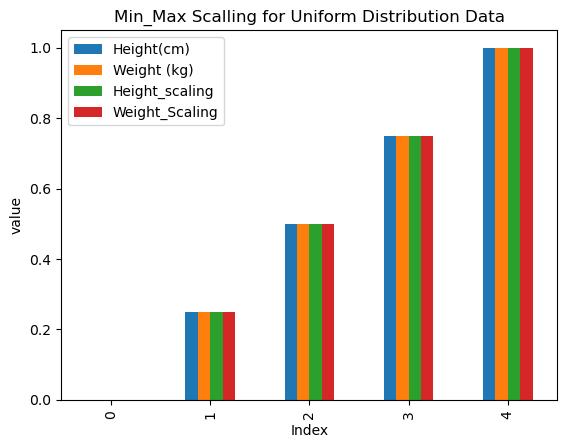

In [29]:
# Visulation or plot

min_max.plot(kind = 'bar')
plt.title("Min_Max Scalling for Uniform Distribution Data")

plt.xlabel("Index"); plt.ylabel("value")

plt.show()


### Min_Max Scalling for Real

In [30]:
# load dataset

df = pd.read_csv('Data.csv')

df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


#### Identify and Handle the Missing data

In [ ]:
# Identify the Missing data
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

- Decision?
    - Our object of interest featues data(Age, Salary) has missing data

In [35]:
# Handle (fill) the missing data

df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Salary'].fillna(df['Salary'].mean(), inplace = True)

df

C:\Users\HP\AppData\Local\Temp\ipykernel_19004\1936131387.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].mean(), inplace = True)


,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


#### Apply min_max scaling

In [ ]:
# formula: mn = (xi - min)/max - min

# step_01: find the min and max value

# sort the featues in ascending order

df1 = df.sort_values(by = ['Age', 'Salary'], ascending = [1,1])
df1

,Country,Age,Salary,Purchased
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
5,France,35.000000,58000.000000,Yes
9,France,37.000000,67000.000000,Yes
3,Spain,38.000000,61000.000000,No
6,Spain,38.777778,52000.000000,No
4,Germany,40.000000,63777.777778,Yes
0,France,44.000000,72000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No


In [41]:
# min value (formula: mn = (xi - min)/max - min)

mn_val_age = df1['Age'].min()

mn_val_salary = df1['Salary'].min()

# max value
mx_val_age = df1['Age'].max()

mx_val_salary = df1['Salary'].max()


# range
range_val_age = mx_val_age - mn_val_age

range_val_salary = mx_val_salary - mn_val_salary


In [44]:
# min_max scaling on Age Column (formula: mn = (xi - min)/max - min)

mn_mx_age = (df1['Age'] - mn_val_age)/range_val_age

mn_mx_age

1    0.000000
2    0.130435
5    0.347826
9    0.434783
3    0.478261
6    0.512077
4    0.565217
0    0.739130
7    0.913043
8    1.000000
Name: Age, dtype: float64

In [45]:
# min_max scaling on Salary Column (formula: mn = (xi - min)/max - min)

mn_mx_salary = (df1['Salary'] - mn_val_salary)/ range_val_salary
mn_mx_salary

1    0.000000
2    0.171429
5    0.285714
9    0.542857
3    0.371429
6    0.114286
4    0.450794
0    0.685714
7    0.885714
8    1.000000
Name: Salary, dtype: float64

In [46]:
df1['Age_mn_scaling'] = mn_mx_age

df1['Salary_mn_scaling'] = mn_mx_salary

df1

,Country,Age,Salary,Purchased,Age_mn_scaling,Salary_mn_scaling
1,Spain,27.000000,48000.000000,Yes,0.000000,0.000000
2,Germany,30.000000,54000.000000,No,0.130435,0.171429
5,France,35.000000,58000.000000,Yes,0.347826,0.285714
9,France,37.000000,67000.000000,Yes,0.434783,0.542857
3,Spain,38.000000,61000.000000,No,0.478261,0.371429
6,Spain,38.777778,52000.000000,No,0.512077,0.114286
4,Germany,40.000000,63777.777778,Yes,0.565217,0.450794
0,France,44.000000,72000.000000,No,0.739130,0.685714
7,France,48.000000,79000.000000,Yes,0.913043,0.885714
8,Germany,50.000000,83000.000000,No,1.000000,1.000000


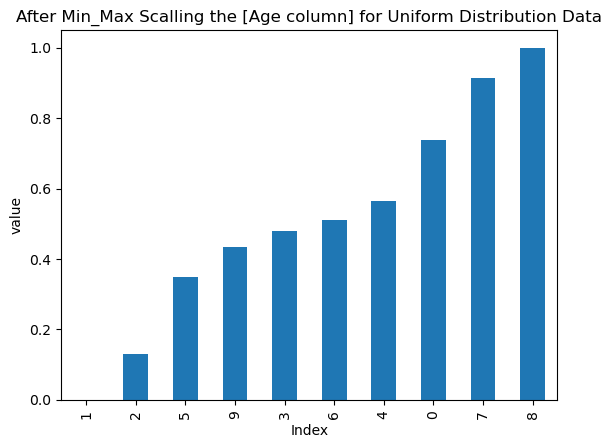

In [52]:
# plot the value for age column

mn_mx_age.plot(kind = 'bar')

plt.title("After Min_Max Scalling the [Age column] for Uniform Distribution Data")

plt.xlabel("Index"); plt.ylabel("value")

plt.show()


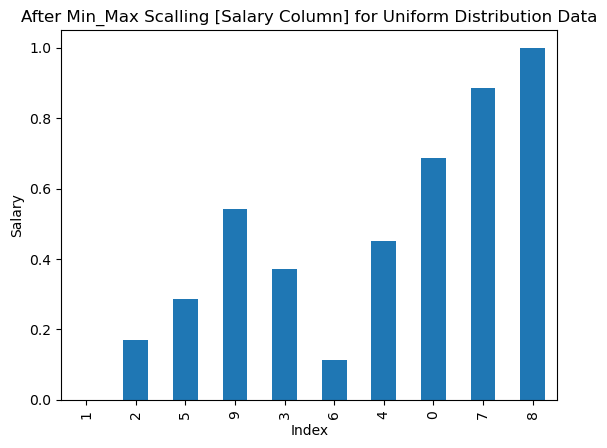

In [58]:
# plot the value for mn_mx_salary column

mn_mx_salary.plot(kind = 'bar')

plt.title("After Min_Max Scalling [Salary Column] for Uniform Distribution Data")

plt.xlabel("Index"); plt.ylabel("Salary")

plt.show()


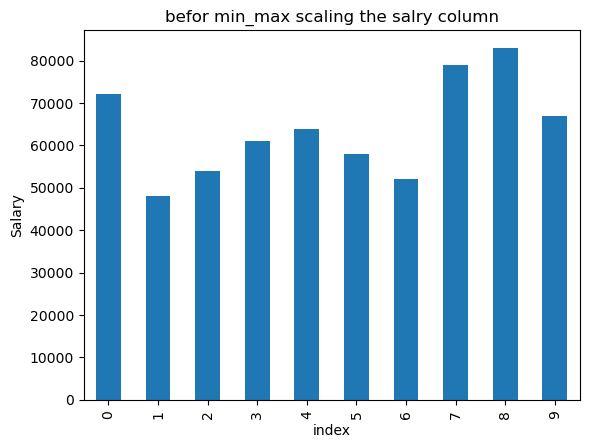

In [ ]:
# befor min_max scaling the salry column

df['Salary'].plot(kind = 'bar')

plt.title("befor min_max scaling the salry column")

plt.xlabel("index")

plt.ylabel("Salary")

plt.show()


### NOTE

- Use min max scaling to convert featues data into a specific range [0-1].

- So, model can learn without misleading data and make accurate prediction.

- min max scaling are useful for uniform data.